## Import library

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import copy as cp
import calendar
from datetime import timedelta

In [2]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.libqsturng
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150

In [3]:
def strtoint(s):
   #print(s)
    if type(s) != str :
        return s
    ss = s.split(',')
    #print(ss[0])
    temp = 0
    for i in range(len(ss)):
        temp = temp * 1000 + int(ss[i])
#     temp = float(temp / 1000000)
    return temp

## Build a library

In [4]:
transportCnt = dict()

In [5]:
year = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [6]:
for i in year:
    for j in month:
        if i == '2022' and j == '04':
            break
        dt_name = '+OÑ_¦¦¦BÑ¦¿t¦+«+¦B¦q¦+¡p_' + i + j+'.csv'
        df = pd.read_csv(dt_name,encoding='big5')
        for k in range(df.shape[0]):
            tmp = df['營運日'][k]
            if(tmp != tmp):
                continue
            tmp = df['營運日'][k].split('/')
            date = datetime(int(tmp[0]) + 1911, int(tmp[1]), int(tmp[2]))
            transport = strtoint(df['總運量'][k])
            transportCnt.setdefault(date,transport)

## Functions

In [7]:
def getHoliday(year, Holiday, df):
    name = []
    y = year
    i = year - 2005
    if(type(df[Holiday][i]) == datetime):
        name.append(df[Holiday][i])
    else:
        start, end = df[Holiday][i].split('-')
        start = start.split('/')
        start = [int(s) for s in start]
        end = end.split('/')
        end = [int(s) for s in end]

        if(start[0] == end[0]):
            name += [datetime(y, start[0], x) for x in np.arange(start[1], end[1] + 1, 1)]
        else:
            lastday = calendar.monthrange(y, start[0])[1]
            if(start[0] == 12):
                name += [datetime(y - 1, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
            else:
                name += [datetime(y, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
            name += [datetime(y, end[0], x) for x in np.arange(1, end[1] + 1, 1)]
    return name

In [8]:
def getHolidayLength(date):
    holiday, column, i = isHoliday([date.year], h_columns, date)
    if(holiday):
        return df[column][i]
    elif(date.isoweekday() == 6 or date.isoweekday() == 7):
        return 2
    else:
        return 0

In [9]:
def isHoliday(years, columns, date):
    for column in columns:
        for year in years:
            if(date in holiday_rec[column][year - 2005]):
                return True, column, year - 2005
    return False, -1, -1

In [10]:
def holiday_type(date):
    y = date.year
    m = date.month
    d = date.day
    traditional = ['春節', '端午', '中秋']
    national = ['雙十', '二二八', '元旦', '清明', '勞動']
    years = np.arange(2015, 2023, 1)
    if(isTyphoon(date) or ((m == 12) and (d == 31))):
        return
    elif(isHoliday(years, traditional, date)[0]):
        return 'Traditional'
    elif(isHoliday(years, national, date)[0]):
        return 'National'
    elif((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
        return 'Western'
    elif((m == 8 and d == 8) or (m == 5 and d <= 14 and d >= 8 and date.isoweekday() == 7)):
        return 'Fother'
    elif(date.isoweekday() == 6 or date.isoweekday() == 7):
        return 'Weekend'
    else:
        return 'Weekday'

In [11]:
def season(date):
    s = []
    start = 3
    for i in range( 4 ) : 
        s.append( [])
        for j in range( 3 ) :
            s[i].append( start ) 
            start = ( start % 12 ) + 1
    m = date.month
    if(m in s[0]):
        return 'Spring'
    elif(m in s[1]):
        return 'Summer'
    elif(m in s[2]):
        return 'Fall'
    else:
        return 'Winter'

In [12]:
def season2(date):
#     s = []
#     start = 5
#     for i in range( 2 ) : 
#         s.append( [])
#         for j in range( 6 ) :
#             s[i].append( start ) 
#             start = ( start % 12 ) + 1
    s = [[6, 7, 8]]
    m = date.month
    if(m in s[0]):
        return 'Summer'
    else:
        return 'Winter'

In [69]:
def new_holiday_type(date):
    holidays = [['除夕'], ['春節'],['端午'],['中秋'], ['雙十'],['二二八'],['元旦'],['清明']]
    y = date.year
    m = date.month
    d = date.day
    years = np.arange(2015, 2023, 1)
    if(((m == 12) and (d == 31))):
        return '跨年'
    elif(isTyphoon(date)):
        return
    for i, h in enumerate(holidays):
        if(isHoliday(years, h, date)[0]):
            return h[0]
    if((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
        return '西洋'
    elif((m == 5 and d <= 14 and d >= 8 and date.isoweekday() == 7)):
        return '母親'
    elif(date.isoweekday() >= 5):
        return
    return '平日'


In [167]:
def new_holiday_type2(date):
    holidays = [['除夕'], ['春節','端午','中秋'],['清明'], ['雙十','二二八','元旦']]
    name = ['除夕', '三大','清明', '國定']
    y = date.year
    m = date.month
    d = date.day
    years = np.arange(2015, 2023, 1)
    if(((m == 12) and (d == 31))):
        return '跨年'
    elif(isTyphoon(date)):
        return
    for i, h in enumerate(holidays):
        if(isHoliday(years, h, date)[0]):
            return name[i]
    if((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
        return '西洋'
#     elif((m == 5 and d <= 14 and d >= 8 and date.isoweekday() == 7)):
#         return '母親'
    if(date.isoweekday() >= 5):
        return str(date.isoweekday())
    return '平日'


In [14]:
def isTyphoon(date):
    if(date in list(df_typhoon['日期'])):
        return True
    return False

## Global

In [15]:
df = pd.read_excel('../歷年連假天數.xlsx')
df = df.drop(index = 18)
df_typhoon = pd.read_excel('../Typhoon_date.xlsx')
columns = ['除夕', '春節.1', '端午.1', '中秋.1', '雙十.1', '二二八.1', '元旦.1', '清明.1', '勞動.1']
years = np.arange(2005, 2023, 1)
holiday_rec = []
for column in columns:
    tmp = []
    for year in years:
        tmp.append(getHoliday(year, column, df))
    holiday_rec.append(tmp)
holiday_rec = pd.DataFrame(holiday_rec).T
h_columns = ['除夕','春節', '端午', '中秋', '雙十', '二二八', '元旦', '清明', '勞動']
holiday_rec.columns = h_columns

--------

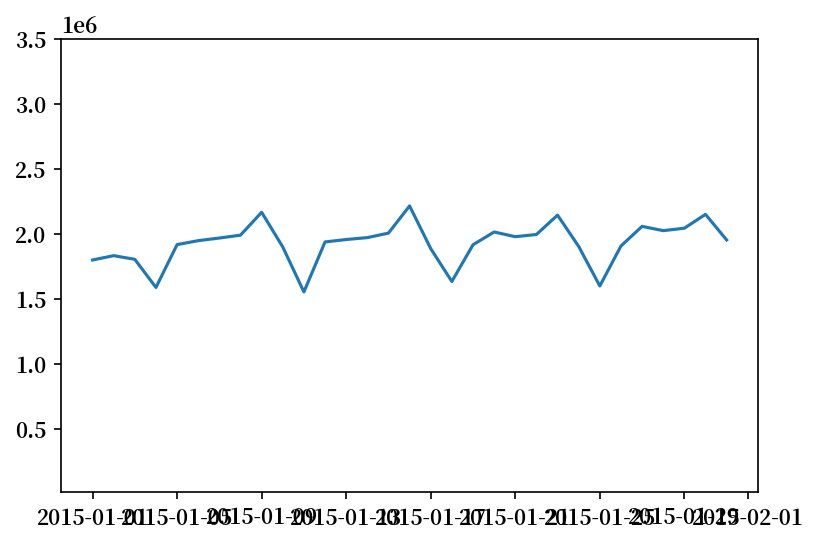

In [34]:
df2 = pd.DataFrame(list(transportCnt.items()), columns=['Date', 'TPcnt'])
df2['Year'] = [day.year for day in df2['Date']]
df2['Month'] = [day.month for day in df2['Date']]
df2['Holiday_Type'] = [new_holiday_type(day) for day in df2['Date']]
df2['Typhoon'] = [isTyphoon(day) for day in df2['Date']]
df3 = df2.copy()
df3 = df3[df3['Year'] == 2015]
df3 = df3[df3['Month'] == 1]
df3 = df3.drop(df3[df3['Holiday_Type'] == '除夕'].index)
df3 = df3.drop(df3[df3['Holiday_Type'] == '跨年'].index)
df3 = df3.drop(df3[df3['Typhoon'] == True].index)
plt.plot(df3['Date'], df3['TPcnt'])
plt.ylim(5**6, 3.5 * 10**6)
plt.show()

In [177]:
df2 = pd.DataFrame(list(transportCnt.items()), columns=['Date', 'TPcnt'])
df2['Year'] = [day.year for day in df2['Date']]
df2['Month'] = [day.month for day in df2['Date']]
df2['Day'] = [day.isoweekday() for day in df2['Date']]
df2['Holiday_Type'] = [new_holiday_type(day) for day in df2['Date']]
df2['Typhoon'] = [isTyphoon(day) for day in df2['Date']]
df2 = df2.drop(df2[df2['Holiday_Type'] == '除夕'].index)
df2 = df2.drop(df2[df2['Holiday_Type'] == '跨年'].index)
df2 = df2.drop(df2[df2['Typhoon'] == True].index)
df2

,Date,TPcnt,Year,Month,Day,Holiday_Type,Typhoon
0,2015-01-01,1796950,2015,1,4,元旦,False
1,2015-01-02,1830184,2015,1,5,元旦,False
2,2015-01-03,1802037,2015,1,6,元旦,False
3,2015-01-04,1585463,2015,1,7,元旦,False
4,2015-01-05,1915326,2015,1,1,平日,False
...,...,...,...,...,...,...,...
2642,2022-03-27,1246748,2022,3,7,None,False
2643,2022-03-28,1919316,2022,3,1,平日,False
2644,2022-03-29,1940394,2022,3,2,平日,False
2645,2022-03-30,1969018,2022,3,3,平日,False


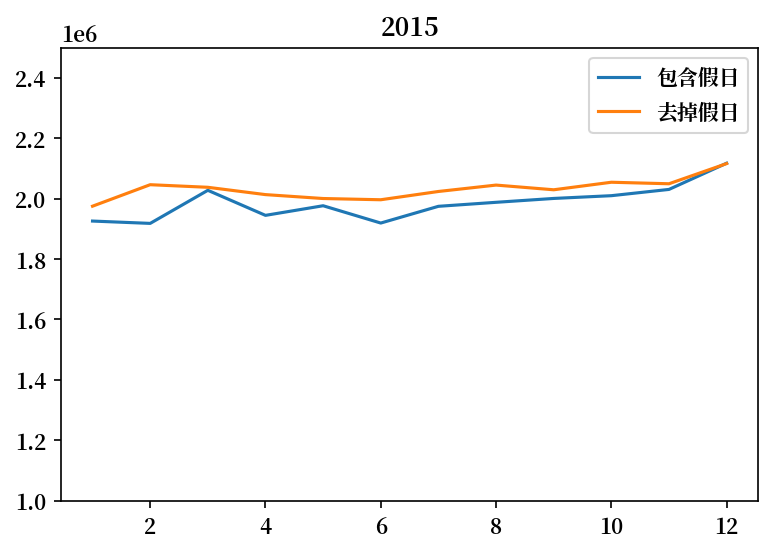

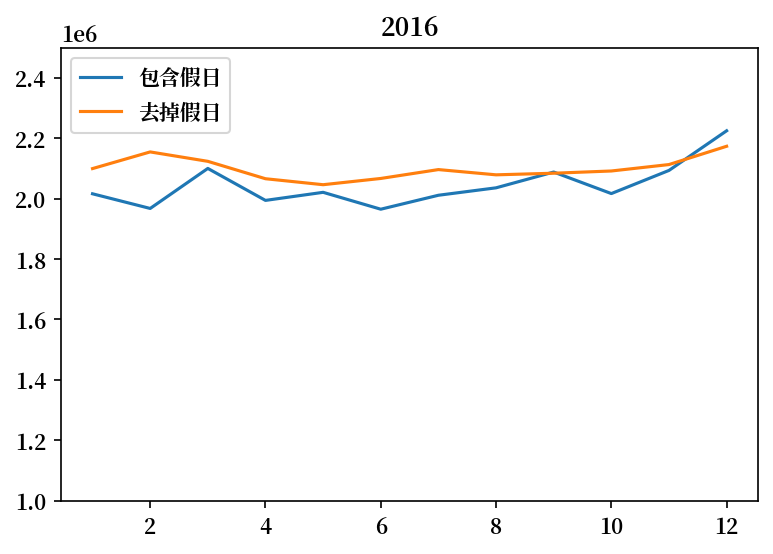

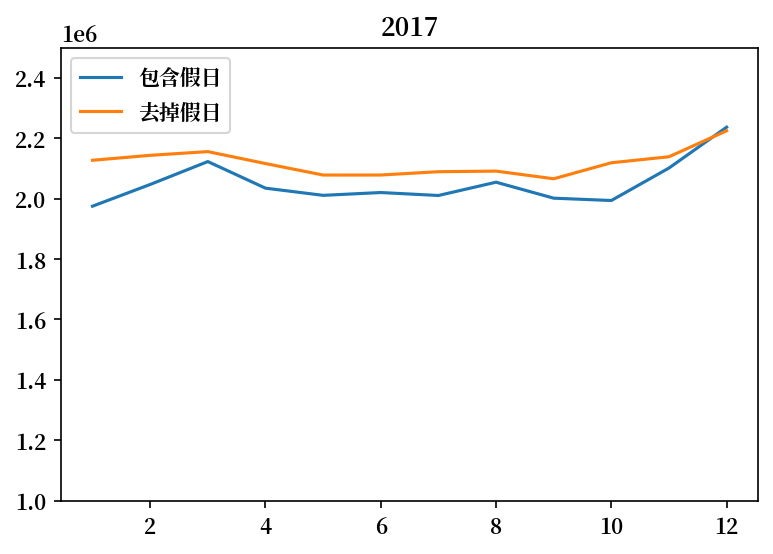

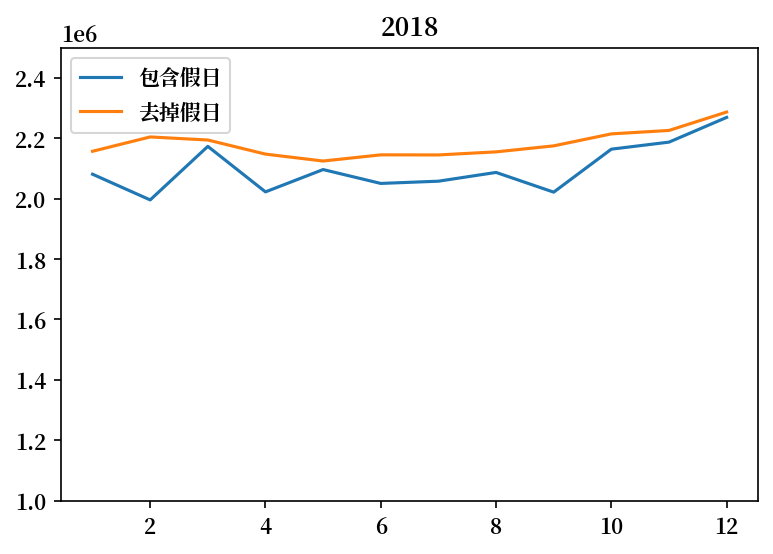

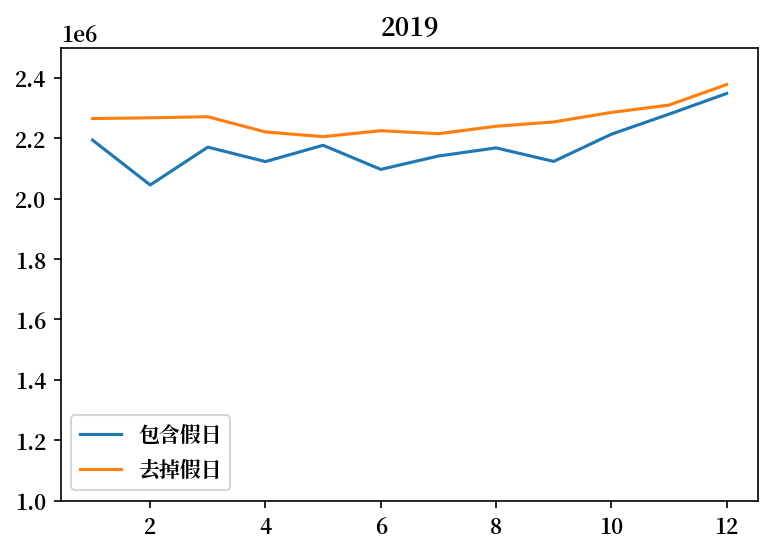

In [178]:
plt.rcParams['font.sans-serif'] = ['Noto Serif TC']

for y in np.arange(2015, 2020, 1):
    df3 = df2.copy()
    df_draw = df3[df3['Year'] == y]

    month_cnt = [df_draw[df_draw['Month'] == i + 1]['TPcnt'].mean() for i in range(12)]
    plt.plot(np.arange(1, 13, 1), month_cnt)
    
    df_draw = df_draw[df_draw['Holiday_Type'] == '平日']
    month_cnt = [df_draw[df_draw['Month'] == i + 1]['TPcnt'].mean() for i in range(12)]
    plt.plot(np.arange(1, 13, 1), month_cnt)
    
    plt.ylim(10**6, 2.5 * 10**6)
    plt.title(str(y))
    plt.legend(['包含假日', '去掉假日'])
    plt.show()


In [19]:
for i in range(5):
    print('& (100 - x_' + str(i) + ')^2 + (150 - y_' + str(i) + ')^2 = L^2 \\\\')

& (100 - x_0)^2 + (150 - y_0)^2 = L^2 \\
& (100 - x_1)^2 + (150 - y_1)^2 = L^2 \\
& (100 - x_2)^2 + (150 - y_2)^2 = L^2 \\
& (100 - x_3)^2 + (150 - y_3)^2 = L^2 \\
& (100 - x_4)^2 + (150 - y_4)^2 = L^2 \\


In [168]:
df2 = pd.DataFrame(list(transportCnt.items()), columns=['Date', 'TPcnt'])
df2['Holiday_Type'] = [new_holiday_type2(day) for day in df2['Date']]
df2['Year'] = [day.year for day in df2['Date']]
df2['Day'] = [day.isoweekday() for day in df2['Date']]
df2['Season'] = [season(day) for day in df2['Date']]
df2['Month'] = [day.month for day in df2['Date']]

df2 = df2.drop(df2[df2['Year'] >= 2020].index)
df2 = df2.drop(df2[c].index)

df2 = df2.drop(df2[df2['Holiday_Type'] == '除夕'].index)
df2 = df2.drop(df2[df2['Holiday_Type'] == '跨年'].index)
# df2 = df2[df2['Holiday_Type'] == '平日']
# df2 = df2.drop(df2[df2['Day'] >= 5].index)

df2 = df2.dropna().reset_index(drop = True)
df2.head()

,Date,TPcnt,Holiday_Type,Year,Day,Season,Month
0,2015-01-01,1796950,國定,2015,4,Winter,1
1,2015-01-02,1830184,國定,2015,5,Winter,1
2,2015-01-03,1802037,國定,2015,6,Winter,1
3,2015-01-04,1585463,國定,2015,7,Winter,1
4,2015-01-05,1915326,平日,2015,1,Winter,1


In [175]:
a = df2['Month'] == 12
b = df2['Holiday_Type'] == ('平日' | '5' | '6' | '7')
c = a & b
c

TypeError: unsupported operand type(s) for |: 'str' and 'str'

In [112]:
np.array(b)

array([False, False, False, ..., False,  True, False])

In [21]:
a = []
x = [1, 2, 3, 4, 6]
for i in df2['Day']:
    if(i in x):
        a.append('上班日')
    else:
        a.append(i)
df2['Cat'] = a

In [22]:
a = []
x = [1, 2, 3, 4]
for i in df2['Month']:
    if(i == 1):
        a.append(1)
    elif(i == 12):
        a.append(12)
    else:
        a.append('Other')
df2['MonCat'] = a

In [170]:
results = smf.ols('TPcnt ~ C(Holiday_Type)', data=df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Holiday_Type),6.834997e+13,7.0,720.583953,0.0
Residual,2.250740e+13,1661.0,NaN,NaN


In [91]:
results = smf.ols('TPcnt ~ C(Holiday_Type) + C(Month) + C(Holiday_Type):C(Month)', data=df2).fit()
# results.summary()
aov = sms.anova_lm(results, typ=2)
aov

D:\New folder\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
D:\New folder\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 3
  warnings.warn('covariance of constraints does not have full '
D:\New folder\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 14
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Holiday_Type),2.398886e+13,2.0,1080.491051,9.483727e-160
C(Month),5.389978e+11,10.0,4.855439,2.335630e-03
C(Holiday_Type):C(Month),8.612639e+11,20.0,3.879250,1.782457e-06
Residual,1.074568e+13,968.0,NaN,NaN


In [171]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9905, p=0.0000


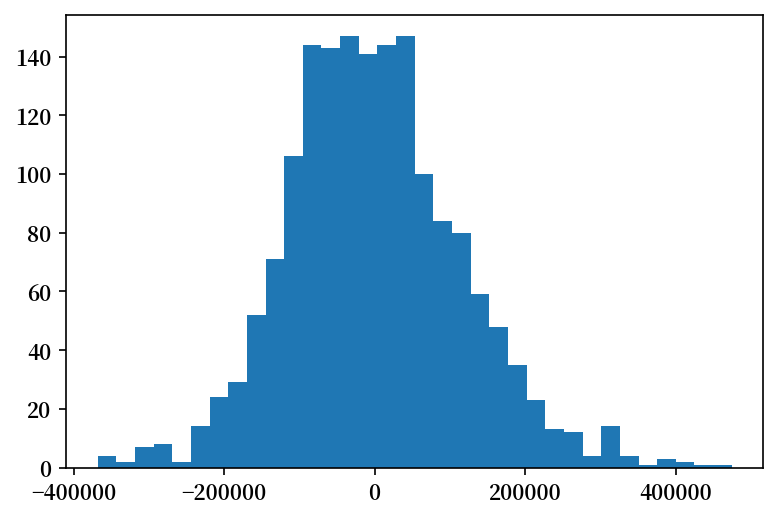

In [164]:
_ = plt.hist(results.resid, bins = "auto")

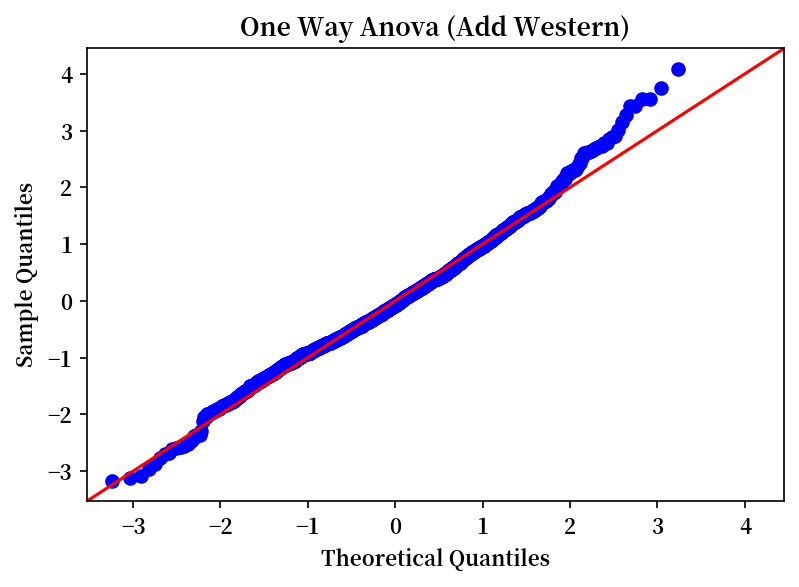

In [165]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')
plt.title('One Way Anova (Add Western)')
plt.show()

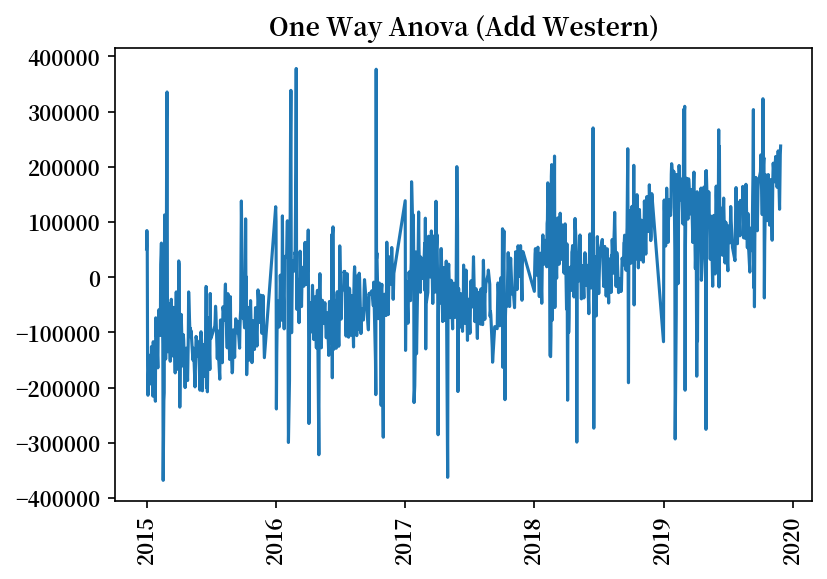

In [87]:
plt.plot(df2['Date'], results.resid)
plt.xticks(rotation = 90)
plt.title('One Way Anova (Add Western)')
plt.show()

In [174]:
import statsmodels.stats.outliers_influence as sso
st1, data1, ss3 = sso.summary_table(results, alpha=0.05)
SD = data1[:, 10]
df1_c = pd.DataFrame([(SD), df2['Date']]).T
df1_c.columns = ['SD', 'Date']
filte = ((df1_c['SD'] < -2) | (df1_c['SD'] > 2))
print("Outliers by SD = \n")
display(df1_c[filte].reset_index(drop = True))

Outliers by SD = 



,SD,Date
0,-2.0113,2015-02-14
1,-3.16382,2015-02-17
2,2.38293,2015-02-28
3,-2.87757,2015-05-01
4,-2.51646,2015-08-28
...,...,...
75,2.52264,2019-12-21
76,2.05481,2019-12-22
77,2.88151,2019-12-25
78,2.64083,2019-12-27


In [172]:
mc = smm.MultiComparison(df2['TPcnt'], df2['Holiday_Type'])
print(mc.tukeyhsd().summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
     5      6 -303534.7575  0.001 -336822.3042 -270247.2108   True
     5      7 -625873.8951  0.001 -659161.4418 -592586.3484   True
     5     三大 -785937.6521  0.001 -838512.3363  -733362.968   True
     5     國定 -544811.3096  0.001 -602879.1014 -486743.5178   True
     5     平日 -222608.1244  0.001 -248682.5578 -196533.6909   True
     5     清明 -687355.9914  0.001  -767843.591 -606868.3918   True
     5     西洋 -154192.5628  0.001 -251401.5064  -56983.6193   True
     6      7 -322339.1376  0.001 -356175.7188 -288502.5564   True
     6     三大 -482402.8947  0.001  -535326.905 -429478.8843   True
     6     國定 -241276.5521  0.001 -299660.8129 -182892.2914   True
     6     平日   80926.6331  0.001   54154.8281  107698.4381   True
     6     清明 -383821.2339  0.001 -464537.4476 -303105.0203   

D:\New folder\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


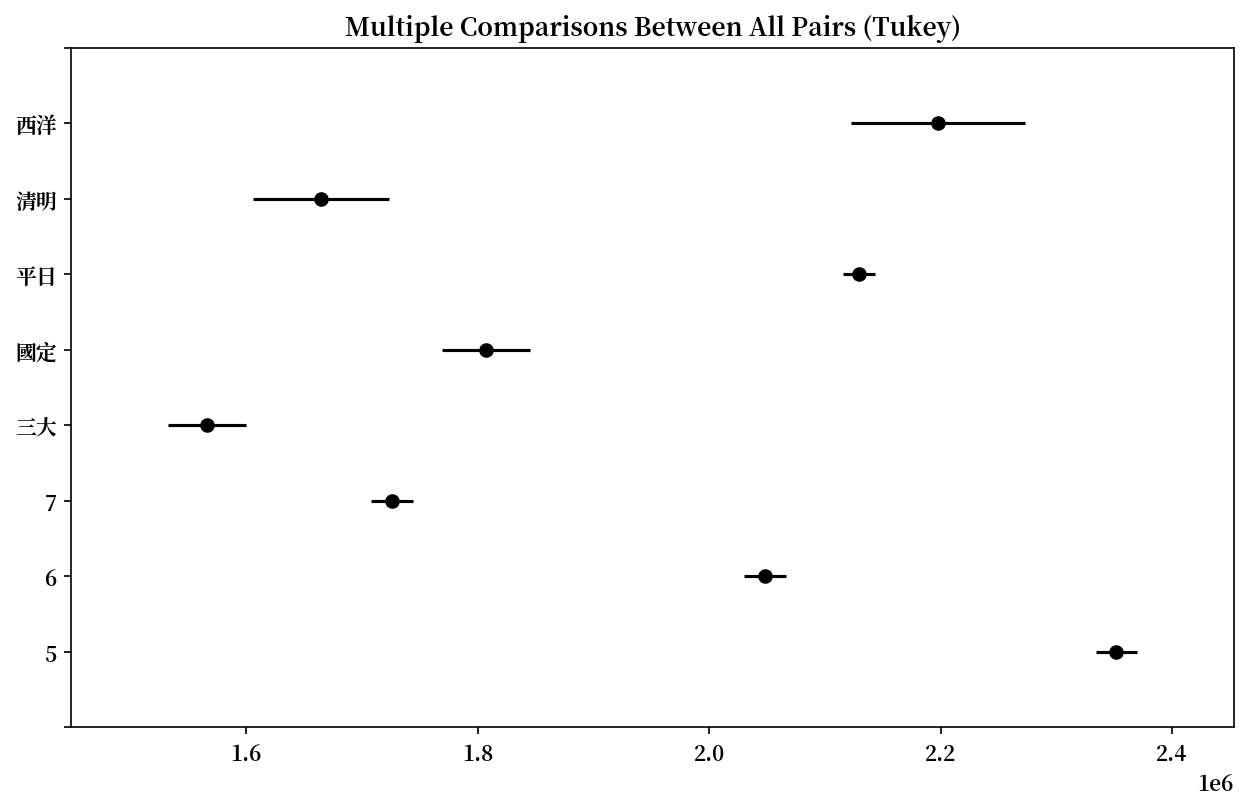

In [173]:
_ = mc.tukeyhsd().plot_simultaneous()